# MSc in Data Analytics 
## Statistics for Data Analysis
## Transport in Ireland

## ...............Assessment 8th of May 2024 at 23:55...........


# EDA

# 1. Importing some libraries:

In [34]:

import pandas as pd
import statistics as stats
import numpy as np
import csv
import seaborn as sns 
# import some libraries for Visualising the price variable:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True) 
import datetime
import math
import random
import calendar





In [2]:
print("Pandas Version:", pd.__version__)

Pandas Version: 2.0.3


# 2. Loading the data 
# Importing the dataset: *THA21 - Average weekly volume of cars for selected traffic count sites*

In [3]:
df = pd.read_csv('THA21.20240419152559 (1).csv')

In [4]:
# Look at the top of the dataset:
df.head()
colorMap = sns.light_palette("pink", as_cmap=True)
styled = df.style.background_gradient(cmap=colorMap)
styled

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,463064.000000
1,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,534609.000000
2,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,549470.000000
3,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,550892.000000
4,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,543468.000000
5,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,6,Week 06,Number,551850.000000
6,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,7,Week 07,Number,567892.000000
7,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,8,Week 08,Number,575255.000000
8,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,9,Week 09,Number,569793.000000
9,THA21C01,Average weekly volume of cars,2019,2019,10,Selected traffic sites - Dublin,10,Week 10,Number,570752.000000


In [5]:
print(df.describe())

        TLIST(W1)        Year  C03910V04662  C01198V01436          VALUE
count   530.00000   530.00000    530.000000     530.00000     496.000000
mean   2021.00000  2021.00000     15.000000      27.00000  333352.625000
std       1.41555     1.41555      5.004724      15.31151  184110.324479
min    2019.00000  2019.00000     10.000000       1.00000   43828.000000
25%    2020.00000  2020.00000     10.000000      14.00000  179434.500000
50%    2021.00000  2021.00000     15.000000      27.00000  200799.000000
75%    2022.00000  2022.00000     20.000000      40.00000  539762.750000
max    2023.00000  2023.00000     20.000000      53.00000  603575.000000


# 3. Checking the data type

In [6]:
df.dtypes

STATISTIC                  object
Statistic Label            object
TLIST(W1)                   int64
Year                        int64
C03910V04662                int64
Transport Traffic Site     object
C01198V01436                int64
Weeks of the year          object
UNIT                       object
VALUE                     float64
dtype: object

# 4. Dropping irrelevant columns  "TLIST(W1)"

In [8]:
df = df.drop(["TLIST(W1)"], axis=1)
df.head(5)

,STATISTIC,Statistic Label,Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,463064.0
1,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,534609.0
2,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,549470.0
3,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,550892.0
4,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,543468.0


# Renaming the column named "C03910V04662"
# Site 10 = Dublin and 20 = Regional

In [10]:
df = df.rename(columns={"C03910V04662": "Site" })
df.head(5)

,STATISTIC,Statistic Label,Year,Site,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,463064.0
1,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,534609.0
2,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,549470.0
3,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,550892.0
4,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,543468.0


In [11]:
# Total number of rows and columns
df.shape

(530, 9)

In [14]:
df.count() 

STATISTIC                 530
Statistic Label           530
Year                      530
Site                      530
Transport Traffic Site    530
C01198V01436              530
Weeks of the year         530
UNIT                      530
VALUE                     496
dtype: int64

In [15]:
df = df.drop_duplicates()
df.head(5)

,STATISTIC,Statistic Label,Year,Site,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,463064.0
1,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,534609.0
2,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,549470.0
3,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,550892.0
4,THA21C01,Average weekly volume of cars,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,543468.0


In [17]:
print(df.isnull().sum())

STATISTIC                  0
Statistic Label            0
Year                       0
Site                       0
Transport Traffic Site     0
C01198V01436               0
Weeks of the year          0
UNIT                       0
VALUE                     34
dtype: int64


In [18]:
df = df.dropna() 
df.count()

STATISTIC                 496
Statistic Label           496
Year                      496
Site                      496
Transport Traffic Site    496
C01198V01436              496
Weeks of the year         496
UNIT                      496
VALUE                     496
dtype: int64

# Visual Aids for EDA

<Axes: xlabel='Year'>

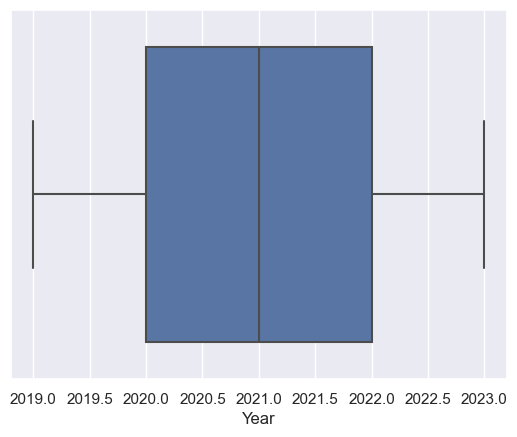

In [19]:
sns.boxplot(x=df["Year"])

<Axes: xlabel='Site'>

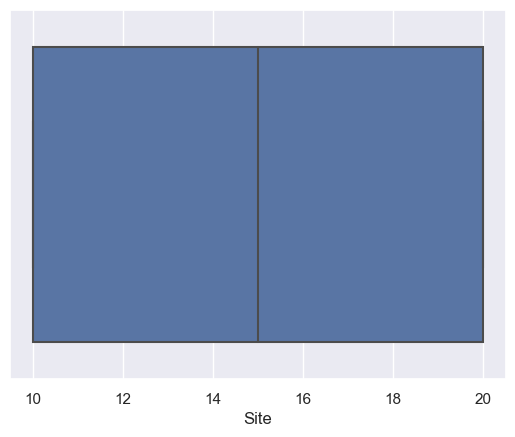

In [20]:
sns.boxplot(x=df["Site"])

<Axes: xlabel='VALUE'>

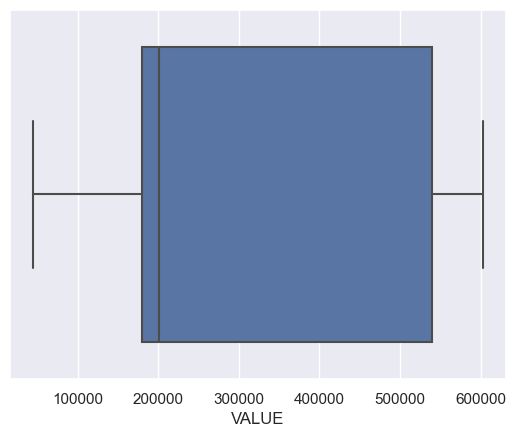

In [22]:
sns.boxplot(x=df["VALUE"])

In [38]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="site",annot=True)
c

ValueError: could not convert string to float: 'THA21C01'

<Figure size 2000x1000 with 0 Axes>

TypeError: unhashable type: 'numpy.ndarray'

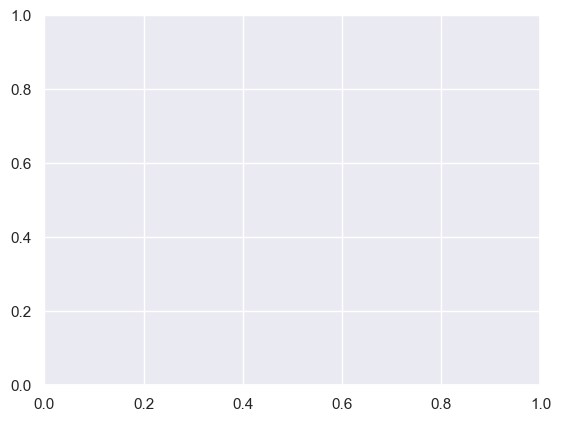

In [29]:
plt.plot(df)

In [32]:
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

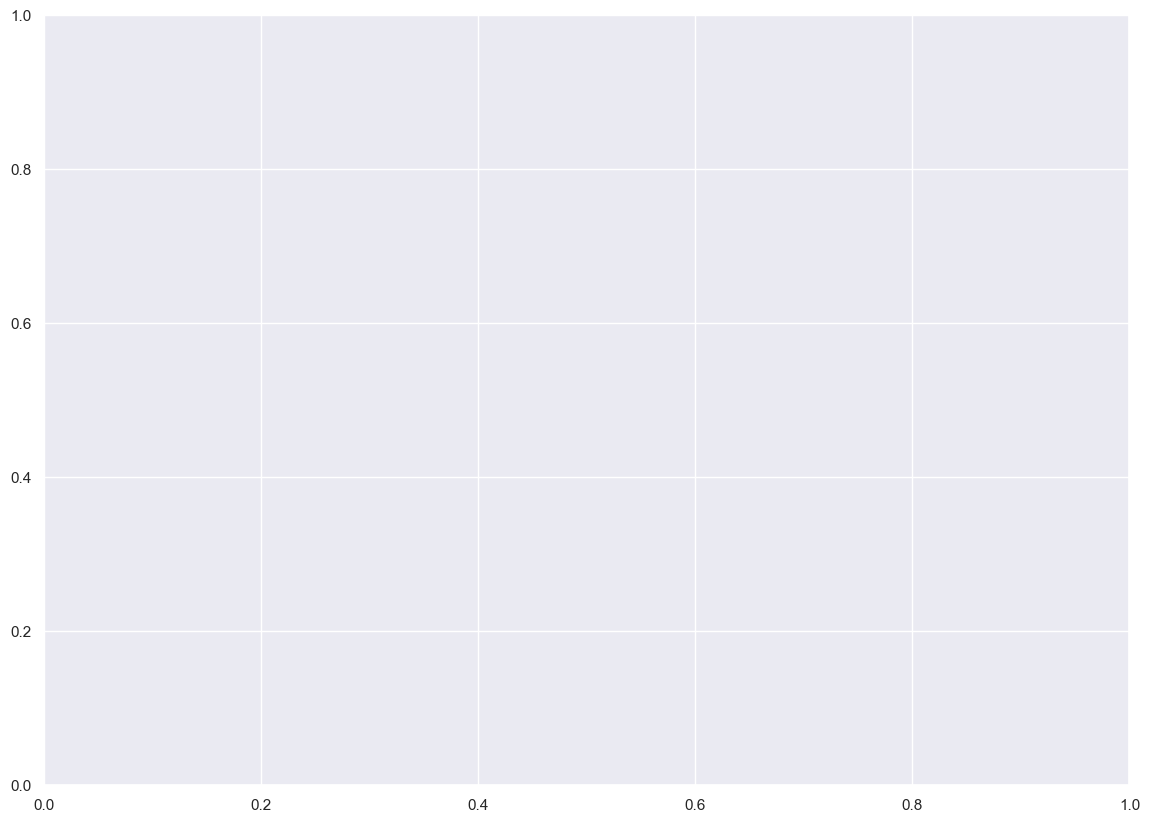

In [33]:
plt.rcParams['figure.figsize'] = (14, 10)
plt.plot(df)


In [35]:
months = list(range(1, 13))
sold_quantity = [round(random.uniform(100, 200)) for x in range(1,
13)]


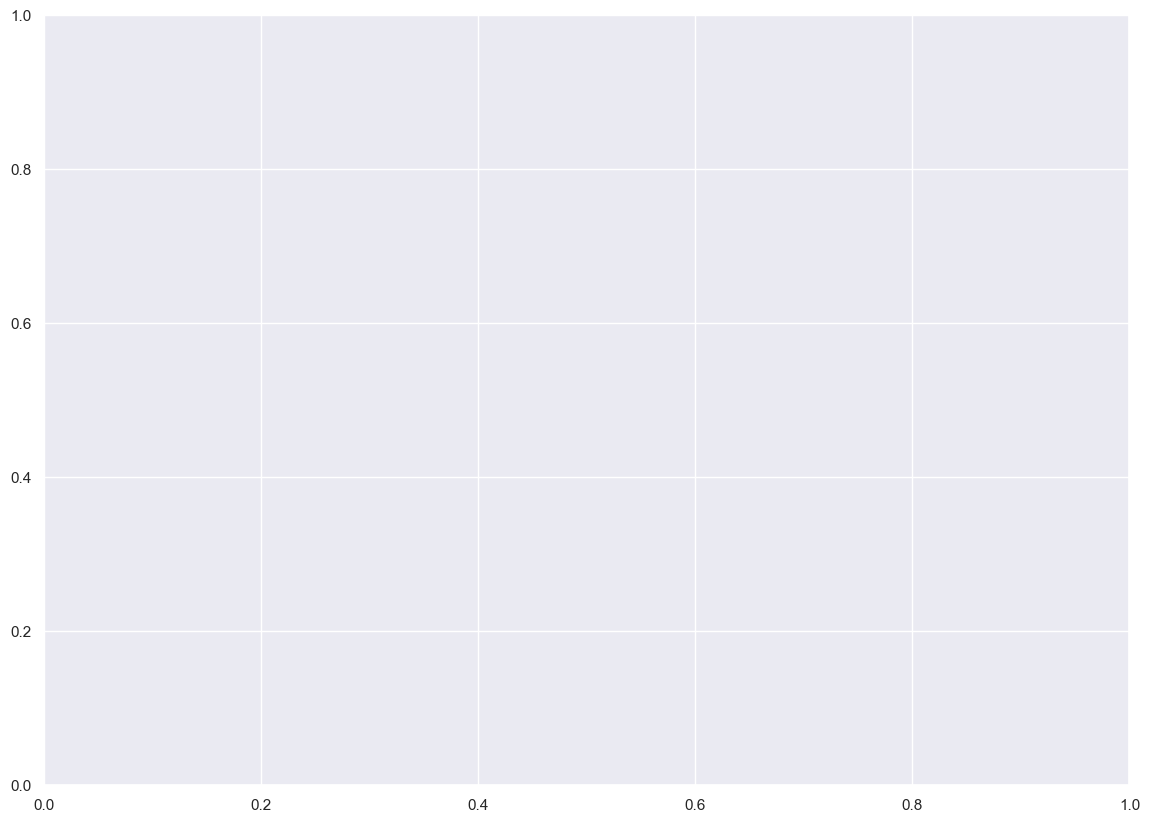

In [36]:
figure, axis = plt.subplots()